In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ptycho_v2.tools_v2.ptychography import Ptychography

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
linop = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)


In [3]:
image = plt.imread('images/peppers_reduced.jpg')[:2**7, :2**7] / 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**7, 2**7)
image_tensor_ = torch.exp(1j * image_tensor)

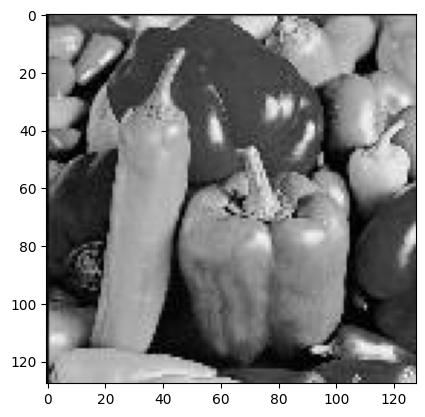

In [4]:
plt.imshow(image, cmap='gray')

In [5]:
a = linop.apply_linop(image_tensor_)
print(a.shape)

torch.Size([1, 289, 512, 512])


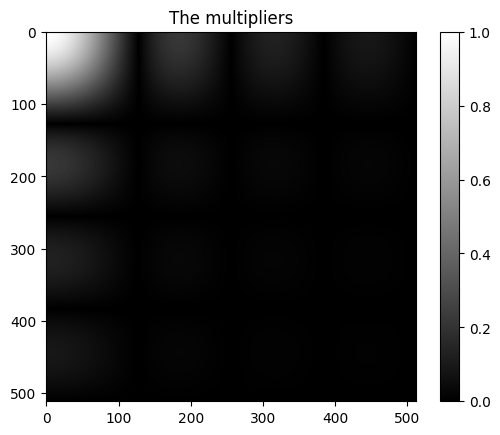

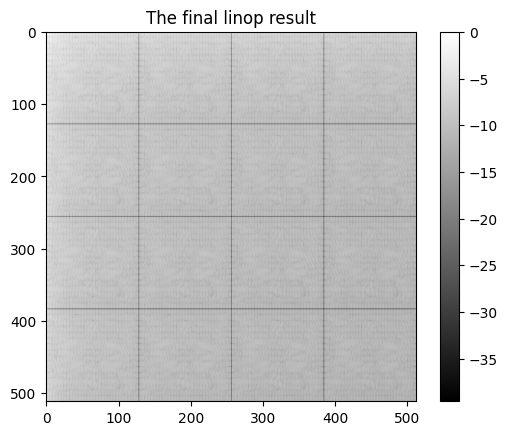

In [6]:

plt.figure()
plt.title("The multipliers")
plt.imshow(torch.abs(linop.multipliers).cpu().numpy(), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.title("The final linop result")
plt.imshow(torch.log(torch.abs(a[0, 102]).cpu()).numpy(), cmap='gray')
plt.colorbar()
plt.show()


In [7]:
c = linop.apply_linopT(a)

In [8]:
print(c.shape)

torch.Size([1, 1, 128, 128])


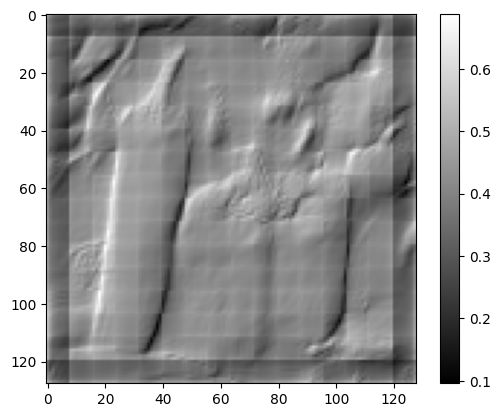

In [9]:
plt.figure()
plt.imshow(torch.abs(c[0, 0]).cpu().numpy(),cmap='gray')
plt.colorbar()
plt.show()

In [10]:
x_t = torch.randn(1, 1, 2**7, 2**7, device=device, dtype=torch.double)
y_t = torch.randn(1, 289, 2**9,2**9, device=device, dtype=torch.double)

In [11]:
a1 = (y_t * linop.apply_linop(x_t)).sum()
a2 = (x_t * linop.apply_linopT(y_t).conj()).sum()

In [12]:
a1

tensor(-95.7919+68.9473j, device='cuda:0', dtype=torch.complex128)

In [13]:
a2

tensor(-95.7919+68.9473j, device='cuda:0', dtype=torch.complex128)

In [14]:
def up(x):
    m = torch.ones(2,2).to(device)
    return torch.kron(x,m) /2

def down(x):
    return x[:,:,0::2,0::2]

In [15]:
x_coarse = image_tensor
x_fine = up(x_coarse)
y_fine = linop.apply_linop(x_fine)
y_coarse = linop.apply_linop(x_coarse)


In [16]:
y_coarse

tensor([[[[ 2.0893e-01+0.0000e+00j, -1.8701e-01-8.0573e-02j,
            1.2912e-01+1.3694e-01j,  ...,
            3.2723e-04-9.1006e-04j, -5.0634e-04+5.3703e-04j,
            3.6597e-04-1.5768e-04j],
          [-1.8883e-01-7.7278e-02j,  1.3666e-01+1.3973e-01j,
           -6.3065e-02-1.6570e-01j,  ...,
           -6.7104e-04+7.3981e-04j,  6.8003e-04-3.0830e-04j,
           -3.9580e-04+7.3465e-06j],
          [ 1.3504e-01+1.3330e-01j, -6.6286e-02-1.6561e-01j,
           -5.5286e-03+1.5839e-01j,  ...,
            8.8840e-04-4.2401e-04j, -7.2008e-04+2.7019e-05j,
            3.4951e-04+1.3564e-04j],
          ...,
          [ 3.8088e-04-9.0956e-04j, -7.3562e-04+7.0157e-04j,
            9.3474e-04-3.4305e-04j,  ...,
           -2.8901e-06-2.3699e-06j,  1.3268e-06+2.7817e-06j,
           -3.6186e-08-1.7743e-06j],
          [-5.2956e-04+5.2275e-04j,  7.0040e-04-2.7181e-04j,
           -7.2008e-04-2.7019e-05j,  ...,
            1.3493e-06+2.7325e-06j, -8.5023e-08-2.4359e-06j,
           -5.086

In [17]:
y_fine

tensor([[[[ 2.0893e-01+0.0000e+00j, -1.8701e-01-8.0573e-02j,
            1.2912e-01+1.3694e-01j,  ...,
            3.2723e-04-9.1006e-04j, -5.0634e-04+5.3703e-04j,
            3.6597e-04-1.5768e-04j],
          [-1.8883e-01-7.7278e-02j,  1.3666e-01+1.3973e-01j,
           -6.3065e-02-1.6570e-01j,  ...,
           -6.7104e-04+7.3981e-04j,  6.8003e-04-3.0830e-04j,
           -3.9580e-04+7.3464e-06j],
          [ 1.3504e-01+1.3330e-01j, -6.6286e-02-1.6561e-01j,
           -5.5286e-03+1.5839e-01j,  ...,
            8.8840e-04-4.2401e-04j, -7.2008e-04+2.7019e-05j,
            3.4951e-04+1.3564e-04j],
          ...,
          [ 3.8088e-04-9.0956e-04j, -7.3562e-04+7.0157e-04j,
            9.3474e-04-3.4305e-04j,  ...,
           -2.8901e-06-2.3699e-06j,  1.3268e-06+2.7817e-06j,
           -3.6185e-08-1.7743e-06j],
          [-5.2956e-04+5.2275e-04j,  7.0040e-04-2.7181e-04j,
           -7.2008e-04-2.7019e-05j,  ...,
            1.3493e-06+2.7325e-06j, -8.5022e-08-2.4359e-06j,
           -5.086